11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
60000 train samples
10000 test samples
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0453 - val_loss: 0.0229
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0179 - val_loss: 0.0134
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0113 - val_loss: 0.0090
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0080 - val_loss: 0.0068
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0064 - val_loss: 0.0057
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step


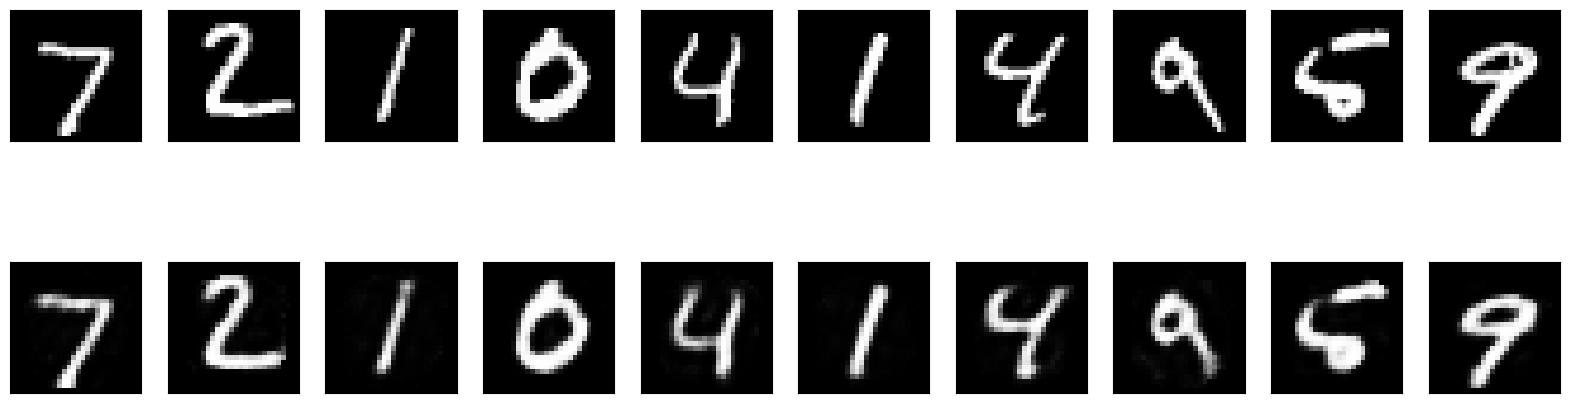

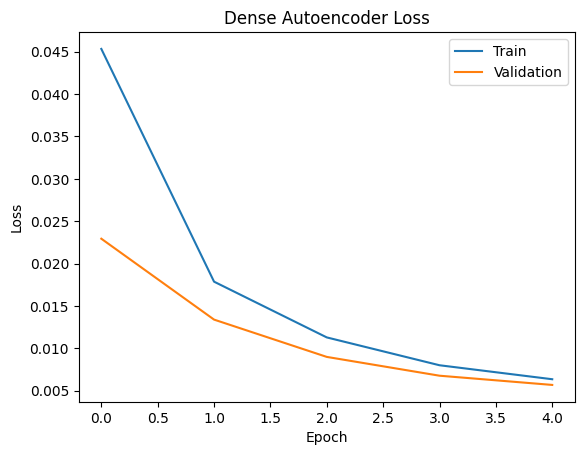

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0404 - val_loss: 0.0191
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0156 - val_loss: 0.0127
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0118 - val_loss: 0.0102
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0099 - val_loss: 0.0090
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0088 - val_loss: 0.0081
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step


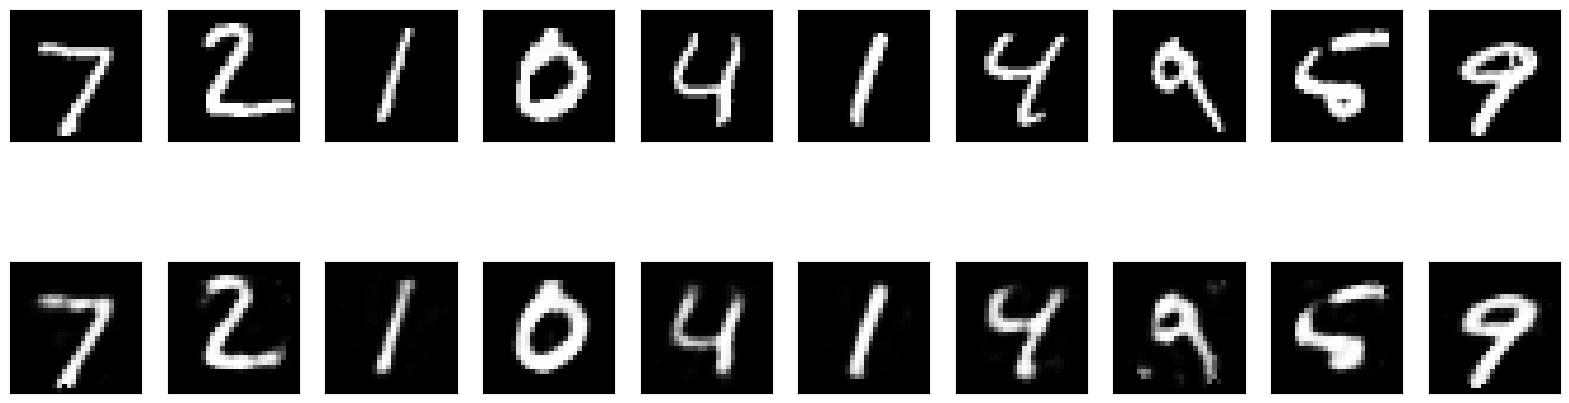

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.6900 - val_loss: 0.6892
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.6877 - val_loss: 0.6867
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.6851 - val_loss: 0.6839
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


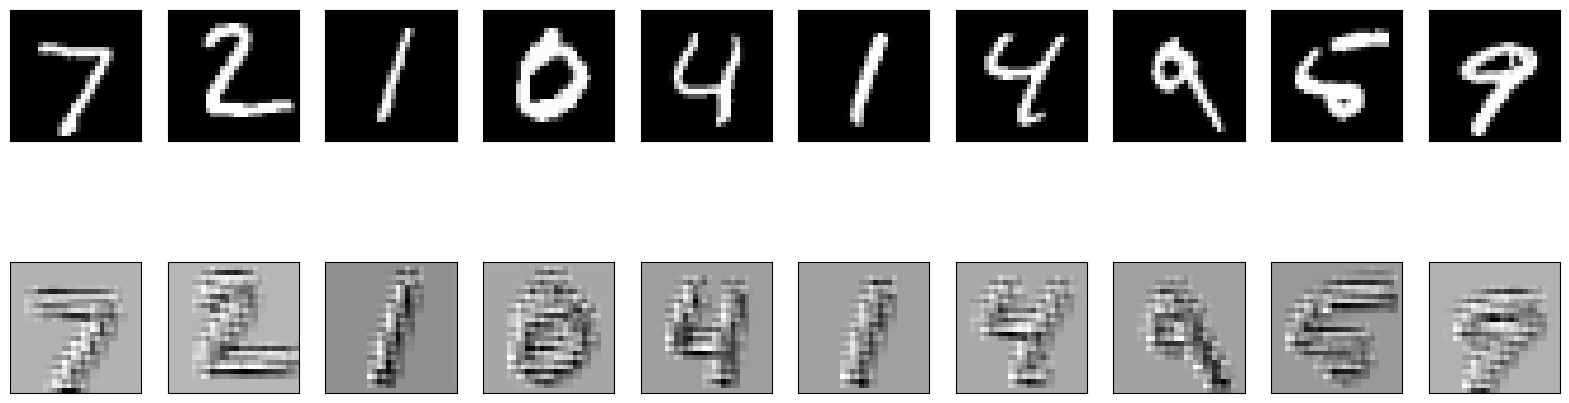

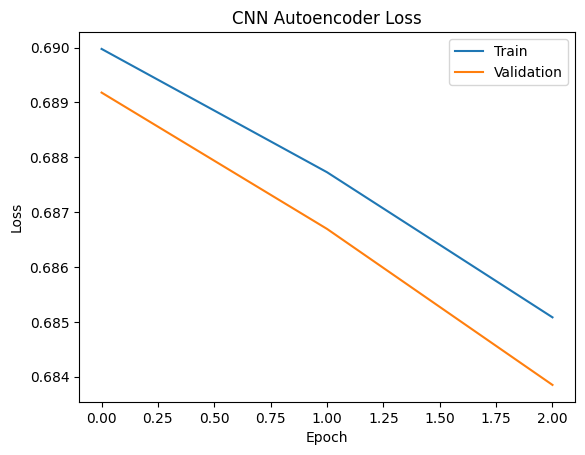

In [1]:
# ---------------------------------------------------------------
# IMPORT REQUIRED LIBRARIES
# ---------------------------------------------------------------
import keras                               # Deep learning library
import numpy as np                         # Used for numerical operations
import matplotlib.pyplot as plt            # Plotting library
from keras.datasets import mnist           # MNIST dataset loader
from keras.layers import (Input, Dense, 
                          Conv2D, MaxPooling2D, 
                          UpSampling2D, ZeroPadding2D)  # Layers for NN models
from keras.models import Model             # Model class for building networks
from tensorflow.keras.utils import to_categorical  # For one-hot encoding


# ---------------------------------------------------------------
# LOAD MNIST DATASET
# ---------------------------------------------------------------
(X_train, _), (X_test, _) = mnist.load_data()  
# We ignore labels (_) because Autoencoders do NOT need class labels.


# ---------------------------------------------------------------
# RESHAPE DATA TO INCLUDE CHANNEL DIMENSION FOR CNN MODELS
# ---------------------------------------------------------------
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # Shape becomes (batch, 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)


# ---------------------------------------------------------------
# NORMALIZE PIXEL VALUES TO RANGE 0–1
# ---------------------------------------------------------------
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

print(X_train.shape[0], 'train samples')   # Displays total training images
print(X_test.shape[0], 'test samples')     # Displays total test images


# ---------------------------------------------------------------
# FLATTEN THE IMAGES FOR THE DENSE AUTOENCODER
# ---------------------------------------------------------------
X_train_flat = X_train.reshape((len(X_train), 28 * 28))  # 28x28 → 784
X_test_flat  = X_test.reshape((len(X_test),  28 * 28))


# ---------------------------------------------------------------
# BASIC DENSE AUTOENCODER (784 → 64 → 784)
# ---------------------------------------------------------------
input_size = 784            # Size of flattened image
hidden_size = 64            # Bottleneck dimension (compressed representation)
output_size = 784           # Output same as input

# Input layer for flattened image
x = Input(shape=(input_size,))

# Encoder: compresses 784 → 64
h = Dense(hidden_size, activation='relu')(x)

# Decoder: decompresses 64 → 784
r = Dense(output_size, activation='sigmoid')(h)

# Complete Model
autoencoder = Model(inputs=x, outputs=r)

# Compile model using Adam optimizer and mean squared error loss
autoencoder.compile(optimizer='adam', loss='mse')


# ---------------------------------------------------------------
# TRAIN BASIC AUTOENCODER
# ---------------------------------------------------------------
epochs = 5
batch_size = 128

history = autoencoder.fit(
    X_train_flat, X_train_flat,     # Autoencoders learn to reconstruct inputs
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test_flat, X_test_flat)  # Validate reconstruction quality
)


# ---------------------------------------------------------------
# ENCODER MODEL — ONLY THE COMPRESSED REPRESENTATION
# ---------------------------------------------------------------
encoder = Model(inputs=x, outputs=h)

# Generate encoded (compressed) images
encoded_imgs = encoder.predict(X_test_flat)


# ---------------------------------------------------------------
# DECODE IMAGES USING TRAINED AUTOENCODER
# ---------------------------------------------------------------
decoded_imgs = autoencoder.predict(X_test_flat)


# ---------------------------------------------------------------
# VISUALIZE ORIGINAL AND RECONSTRUCTED IMAGES (DENSE AUTOENCODER)
# ---------------------------------------------------------------
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_flat[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


# ---------------------------------------------------------------
# PLOT TRAINING AND VALIDATION LOSS
# ---------------------------------------------------------------
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Dense Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


# ---------------------------------------------------------------
# DEEP DENSE AUTOENCODER (784 → 128 → 64 → 128 → 784)
# ---------------------------------------------------------------
input_size = 784
hidden_size = 128
code_size = 64  # More compressed representation

# Input Layer
x = Input(shape=(input_size,))

# Encoder: 784 → 128 → 64
h = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(h)

# Decoder: 64 → 128 → 784
h = Dense(hidden_size, activation='relu')(h)
r = Dense(output_size, activation='sigmoid')(h)

# Deep Autoencoder Model
deep_autoencoder = Model(inputs=x, outputs=r)

deep_autoencoder.compile(optimizer='adam', loss='mse')


# ---------------------------------------------------------------
# TRAIN DEEP AUTOENCODER
# ---------------------------------------------------------------
history2 = deep_autoencoder.fit(
    X_train_flat, X_train_flat,
    batch_size=batch_size,
    epochs=5,
    verbose=1,
    validation_data=(X_test_flat, X_test_flat)
)


# ---------------------------------------------------------------
# RECONSTRUCT USING DEEP AUTOENCODER
# ---------------------------------------------------------------
decoded_imgs2 = deep_autoencoder.predict(X_test_flat)


# ---------------------------------------------------------------
# VISUALIZE RESULTS (DEEP AUTOENCODER)
# ---------------------------------------------------------------
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_flat[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Deep reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs2[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


# ---------------------------------------------------------------
# CONVOLUTIONAL AUTOENCODER (CNN BASED)
# ---------------------------------------------------------------
x = Input(shape=(28, 28, 1))   # Input is a 28×28 gray image

# Encoder
conv1 = Conv2D(16, (3,3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2,2), padding='same')(conv1)

# Decoder
upsample1 = UpSampling2D((2,2))(pool1)
conv2 = Conv2D(1, (3,3), activation='sigmoid', padding='same')(upsample1)

# Full CNN Autoencoder
cnn_autoencoder = Model(inputs=x, outputs=conv2)

cnn_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


# ---------------------------------------------------------------
# TRAIN CNN AUTOENCODER
# ---------------------------------------------------------------
history3 = cnn_autoencoder.fit(
    X_train, X_train,
    batch_size=128,
    epochs=3,
    verbose=1,
    validation_data=(X_test, X_test)
)


# ---------------------------------------------------------------
# RECONSTRUCT USING CNN AUTOENCODER
# ---------------------------------------------------------------
decoded_imgs3 = cnn_autoencoder.predict(X_test)


# ---------------------------------------------------------------
# VISUALIZATION (CNN AUTOENCODER)
# ---------------------------------------------------------------
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs3[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


# ---------------------------------------------------------------
# PLOT LOSS FOR CNN AUTOENCODER
# ---------------------------------------------------------------
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('CNN Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
